In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Data Immersion\Achievement 6- Denver Crime'

In [3]:
df=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'crimes_derived.csv'), index_col=False)

In [ ]:
#data has been cleaned previously, will proceed to analysis

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_type_name,offense_category_id,first_occurrence_date,...,North America FB,Percent Living in Poverty,Percent Families in Poverty,GlobalID,Shape__Area,Shape__Length,danger_score_x,danger_score_y,danger_score,Danger Category
0,0,0,2.022749e+08,2.020000e+14,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,2/12/2022 22:45,...,0,0.0,0.0,578ee93f-c666-4afb-a5da-464a0e1ce408,17995417.42,17705.43233,0.125999,0.125999,0.125999,Low danger
1,1,1,2.020529e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,9/1/2020 15:30,...,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330,0.153698,0.153698,0.153698,Low danger
2,2,2,2.019905e+06,2.020000e+12,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,12/31/2018 21:30,...,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330,0.153698,0.153698,0.153698,Low danger
3,3,3,2.022261e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,5/24/2022 21:10,...,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330,0.153698,0.153698,0.153698,Low danger
4,4,4,2.022432e+09,2.020000e+15,2999,0,criminal-mischief-other,Criminal mischief - other,public-disorder,8/22/2022 22:45,...,0,18.4,16.9,e08a87f1-5d62-4f3c-9c82-fe2177912601,43089441.09,27352.42330,0.153698,0.153698,0.153698,Low danger


# Scatterplot

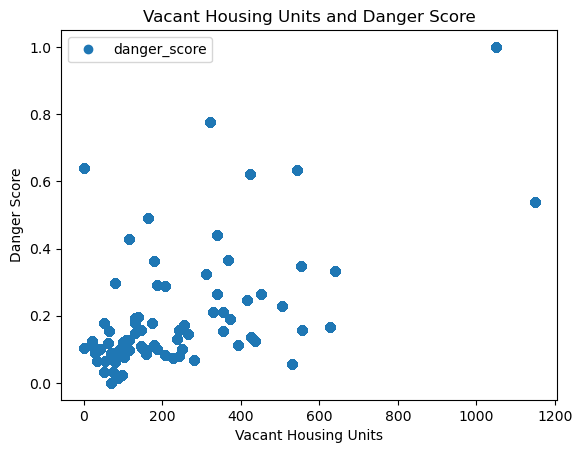

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
#I chose 'vacant housing units' since it had the highest correlation with the danger_score at 0.59.

df.plot(x = 'Vacant Housing Units', y='danger_score',style='o')
plt.title('Vacant Housing Units and Danger Score')  
plt.xlabel('Vacant Housing Units')  
plt.ylabel('Danger Score')  
plt.show()

In [ ]:
#Hypothesis: the presence of more vacant housing untis will lead to the neighborhood having a higher danger score.

# One more correlation heatmap

In [ ]:
#before moving on to the regression, I want to do one more correlation heatmp to check other variables

In [6]:
#creating a subset of the variables I want to analyze
sub=df[['danger_score', 'Built 1939 or Earlier', 'Median Home Value', 'Married Couple Family', 'Spanish', 'Grades 9 to 12', 'Median Age All', 'Commute Over 60 Minutes']]

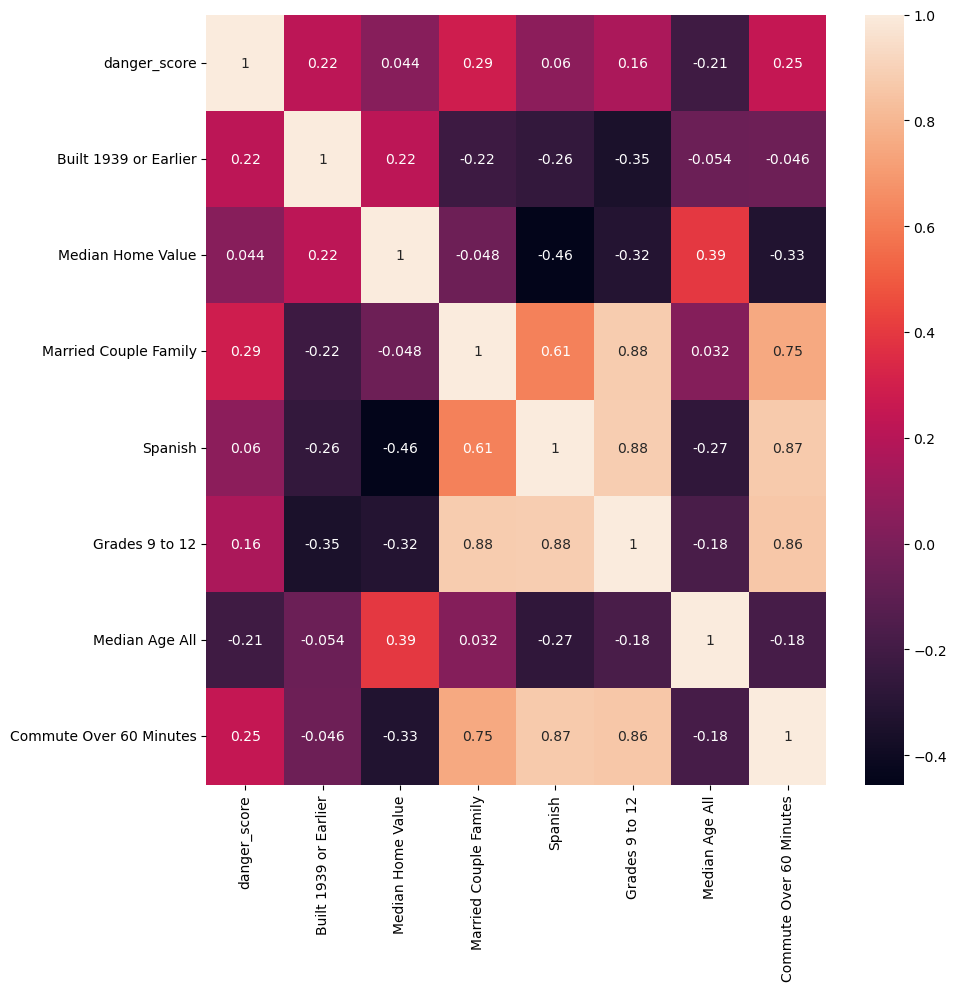

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [ ]:
#surprisingly, no other strong correlations detected to the neighborhood danger score
#I would have thought that low home values, the presence of more young people, the presence of families would have had more of a relationship

In [8]:
corr.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr_heatmap_other.png'))

# Regression Analysis

In [6]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Vacant Housing Units'].values.reshape(-1,1)
y = df['danger_score'].values.reshape(-1,1)

In [7]:
X

array([[ 21],
       [ 63],
       [ 63],
       ...,
       [556],
       [556],
       [556]], dtype=int64)

In [8]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Create a regression object.

regression = LinearRegression()

In [10]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

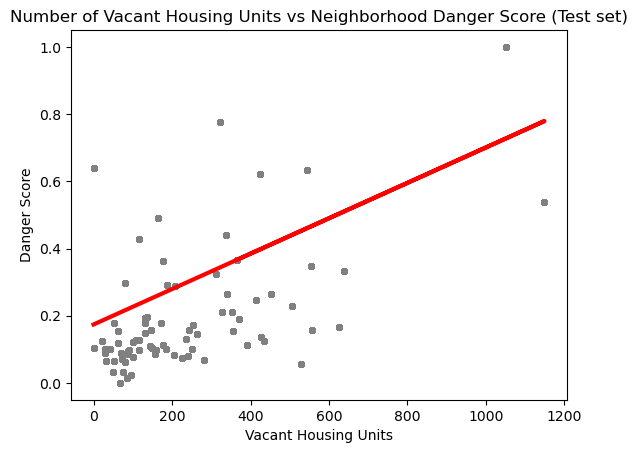

In [12]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Vacant Housing Units vs Neighborhood Danger Score (Test set)')
plot_test.xlabel('Vacant Housing Units')
plot_test.ylabel('Danger Score')
plot_test.show()

In [13]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [14]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00052696]]
Mean squared error:  0.044006842460223704
R2 score:  0.3522080207328937


In [15]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.638229,0.173922
1,0.105231,0.252439
2,0.621555,0.396826
3,0.490420,0.259817
4,0.156587,0.466911
5,0.105231,0.252439
6,0.297193,0.216079
7,0.177688,0.242954
8,0.633263,0.460588
9,0.776887,0.343603


In [16]:
# compare how the regression fits the training set

y_predicted_train = regression.predict(X_train)

In [17]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [18]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00052696]]
Mean squared error:  0.04407615920717058
R2 score:  0.34834405685883885


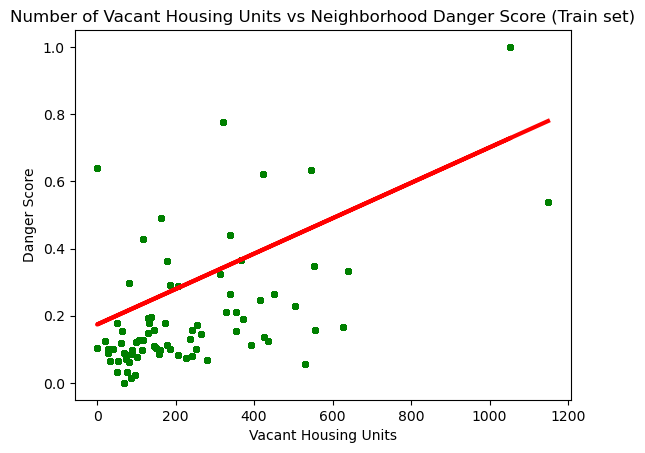

In [19]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Vacant Housing Units vs Neighborhood Danger Score (Train set)')
plot_test.xlabel('Vacant Housing Units')
plot_test.ylabel('Danger Score')
plot_test.show()

# Removing outliers

In [23]:
# Clean the extreme values from the "Danger score" variable observed during the consistency checks.

df_test = df[df['danger_score'] <=0.7] 

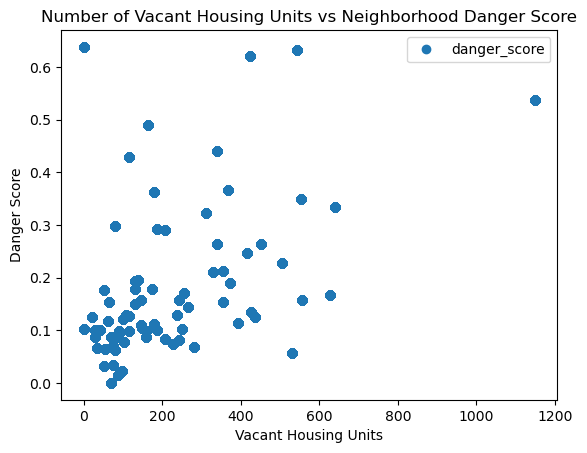

In [24]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Vacant Housing Units', y='danger_score', style='o')  
plt.title('Number of Vacant Housing Units vs Neighborhood Danger Score')  
plt.xlabel('Vacant Housing Units')  
plt.ylabel('Danger Score')  
plt.show()

In [25]:
# Reshape again.

X_2 = df_test['Vacant Housing Units'].values.reshape(-1,1)
y_2 = df_test['danger_score'].values.reshape(-1,1)

In [26]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [27]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [28]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [29]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00027686]]
Mean squared error:  0.029192121099822776
R2 score:  0.13179639970967094


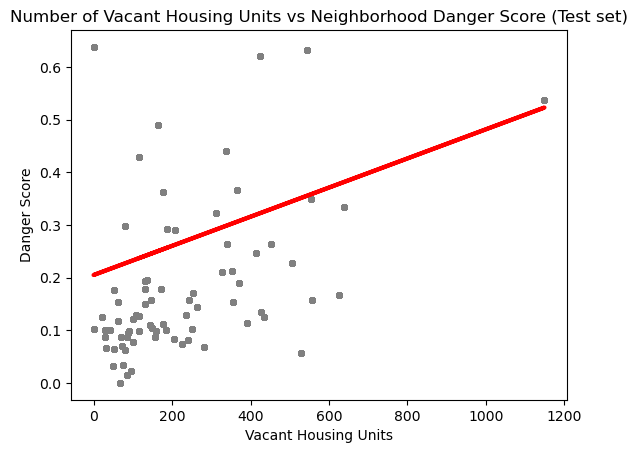

In [31]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Number of Vacant Housing Units vs Neighborhood Danger Score (Test set)')
plot_test.xlabel('Vacant Housing Units')
plot_test.ylabel('Danger Score')
plot_test.show()

In [ ]:
#removing those outliers made the model even worse. 
#before ending this notebook, I want to try to remove the outliers from the other variable to see if that has any effect.

# Removing outliers round two

In [32]:
# Clean the extreme values from the "Vacant Housing Units" variable observed during the consistency checks.

df_tests = df[df['Vacant Housing Units'] <=700] 

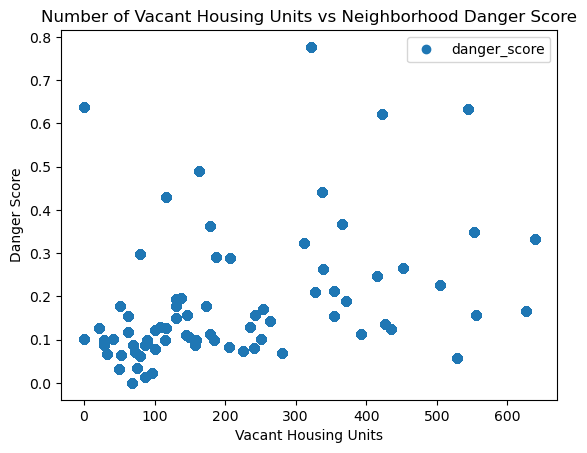

In [33]:
# See how the scatterplot looks without outliers.

df_tests.plot(x = 'Vacant Housing Units', y='danger_score', style='o')  
plt.title('Number of Vacant Housing Units vs Neighborhood Danger Score')  
plt.xlabel('Vacant Housing Units')  
plt.ylabel('Danger Score')  
plt.show()

In [35]:
# Reshape again.

X_3 = df_tests['Vacant Housing Units'].values.reshape(-1,1)
y_3 = df_tests['danger_score'].values.reshape(-1,1)

In [36]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [37]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_3, y_train_3)

LinearRegression()

In [38]:
# Predict.

y_predicted_3 = regression.predict(X_test_3)

In [39]:
rmse = mean_squared_error(y_test_3, y_predicted_3)
r2 = r2_score(y_test_3, y_predicted_3)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00031371]]
Mean squared error:  0.04011925956591663
R2 score:  0.06969138920086493


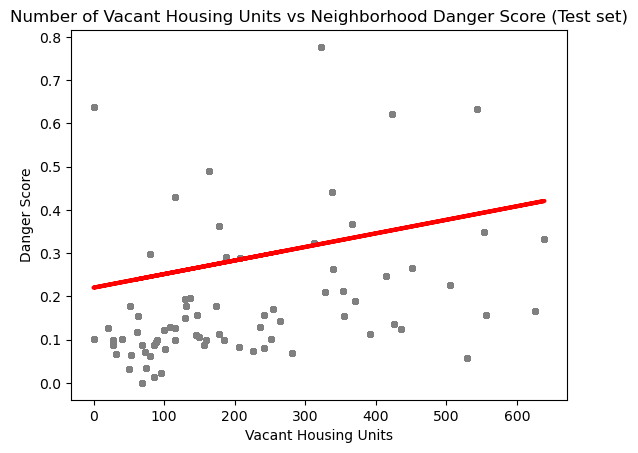

In [41]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Number of Vacant Housing Units vs Neighborhood Danger Score (Test set)')
plot_test.xlabel('Vacant Housing Units')
plot_test.ylabel('Danger Score')
plot_test.show()

In [ ]:
#This is the worst one yet. Clearly, removing outliers on either end does not help improve the model. 

In [ ]:
#Regarding possible data bias, it's hard for me to discern in this situation. 
#Perhaps there is collection bias- the only vacant houses/units that get included are the ones that have an issue arise with them, which then alerts people to be aware of it.